In [103]:
import os
import copy
from itertools import count
import json
import pickle
import numpy as np

import matplotlib.pyplot as plt

In [104]:
# open json file
path = './evogym-design-tool/exported/'
env_file = os.path.join(path, 'terrain (1).json')

with open(env_file) as f:
    env_json = json.load(f)

In [105]:
width, height = env_json['grid_width'], env_json['grid_height']+5
print(width, height)

text = np.full((height,width),'-')
print(text)

100 13
[['-' '-' '-' ... '-' '-' '-']
 ['-' '-' '-' ... '-' '-' '-']
 ['-' '-' '-' ... '-' '-' '-']
 ...
 ['-' '-' '-' ... '-' '-' '-']
 ['-' '-' '-' ... '-' '-' '-']
 ['-' '-' '-' ... '-' '-' '-']]


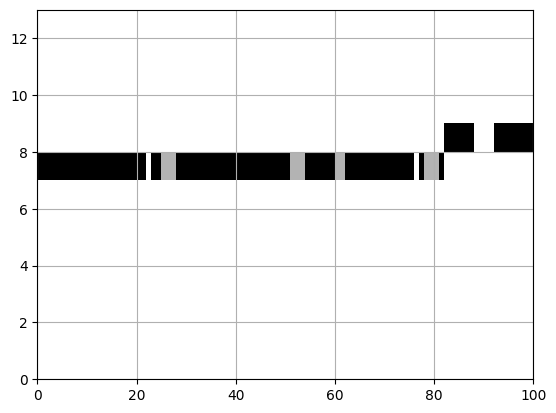

In [106]:
fig, ax = plt.subplots()

for platform in env_json['objects'].values():
    for idx, t in zip(platform['indices'],platform['types']):
        x = idx % width
        y = idx // width

        if t==2: 
            color = [0.7,0.7,0.7]
            text[y,x] = 'S'
        else:
            color = 'k'
            text[y,x] = 'H'
        ax.fill_between([x,x+1], [y+1, y+1], [y, y], fc=color)

text1 = np.flipud(text)
ax.set_xlim([0,width])
ax.set_ylim([0,height])
ax.grid()
plt.show()

In [107]:
# 画像ファイルの保存
output_file = 'output.png'

# 図の保存
fig.savefig(output_file, dpi=300, bbox_inches='tight')

In [108]:
Text = []
for i in text1:
    t = "".join(i)
    Text.append(t)
Text

['----------------------------------------------------------------------------------------------------',
 '----------------------------------------------------------------------------------------------------',
 '----------------------------------------------------------------------------------------------------',
 '----------------------------------------------------------------------------------------------------',
 '----------------------------------------------------------------------------------HHHHHH----HHHHHHHH',
 'HHHHHHHHHHHHHHHHHHHHHH-HHSSSHHHHHHHHHHHHHHHHHHHHHHHSSSHHHHHHSSHHHHHHHHHHHHHH-HSSSH------------------',
 '----------------------------------------------------------------------------------------------------',
 '----------------------------------------------------------------------------------------------------',
 '----------------------------------------------------------------------------------------------------',
 '-----------------------------------------------------

In [109]:
# JSONLファイルに保存するためのデータ作成
data = {
    "prompt": "list of environment data",
    "completion": {
        "text": str(Text)
    }
}

# JSONLファイルにデータを書き込む
jsonl_file = 'dataset/gpt-dataset.jsonl'

with jsonlines.open(jsonl_file, mode='w') as writer:
    writer.write(data)

print(f'データがJSONLファイルに保存されました。')

データがJSONLファイルに保存されました。
